In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram
%matplotlib inline


In [3]:
#reading data
df = pd.read_excel('Assessment edited.xlsx')

In [4]:
#information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
Timestamp                                                      106 non-null datetime64[ns]
Name                                                           106 non-null object
Gender                                                         106 non-null object
Age                                                            106 non-null int64
Education                                                      106 non-null object
Marital Status                                                 106 non-null object
Occupation                                                     106 non-null object
Annual Income                                                  106 non-null object
Average Investment Amount                                      106 non-null object
Withdrawing money                                              106 non-null object
I plan to spend all of the funds in                       

In [5]:
#looking at the dataset
df.head(5)

,Timestamp,Name,Gender,Age,Education,Marital Status,Occupation,Annual Income,Average Investment Amount,Withdrawing money,I plan to spend all of the funds in,Knowledge of investments,When I invest my money,Select the investments you currently own :,Consider this scenario: What would you do?,Which range of possible outcomes is most acceptable to you?,Time Horizon,Risk toleance score,Risk Profile
0,2021-03-06 17:52:35.497,Rahul,Male,22,PG,Single,Student,"₹0 - ₹2,50,000","₹ 10 - ₹10,000",3–5 years,2–5 years,Limited,Equally concerned about my investment losing o...,Stocks and/or stock funds,Do nothing,9.0% 25.0% -12.1%,4,21,CONSERVATIVE
1,2021-03-09 13:57:03.888,DIVYA K,Female,23,PG,Single,Student,"₹0 - ₹2,50,000","₹ 10 - ₹10,000",Less than 3 years,Less than 2 years,Limited,Most concerned about my investment losing value,Bonds and/or bond funds,Sell some of my shares,9.0% 25.0% -12.1%,1,11,CONSERVATIVE
2,2021-03-09 14:00:25.903,Adharsh,Male,27,UG,Single,Student,"₹0 - ₹2,50,000","₹10,000 - ₹ 50,000",Less than 3 years,6–10 years,Limited,Most concerned about my investment gaining value,Stocks and/or stock funds,Buy more shares,9.0% 25.0% -12.1%,5,28,MODERATE
3,2021-03-09 14:16:18.113,Magesh P,Male,55,DIPLOMA,Married,Self - employed/entrepreneur,Above ₹ 15 Lakhs,"Above 50,000",6–10 years,11 years or more,Good,Equally concerned about my investment losing o...,Stocks and/or stock funds,Do nothing,7.2%( Average annual return) 16.3%(Best-case) ...,15,22,MODERATE
4,2021-03-09 14:22:11.359,Mansoor Ali Khan,Male,37,UG,Single,Employed,"₹2,50,000 - ₹ 15 lakhs","Above 50,000",3–5 years,2–5 years,Extensive,Most concerned about my investment gaining value,International securities and/or international ...,Buy more shares,10.4% 33.6% -18.2%,4,40,MODERATE


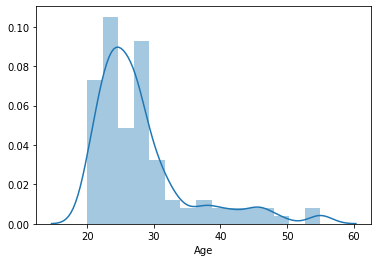

In [6]:
#visualizating the numerical data
sns.distplot(df['Age'])

# Binary Conversion
python's science kit learn(sklearn) cannot read sting data as input for classification so we convert them in to 0,1,2 and son on.

In [7]:
df.Gender = df.Gender.map({'Male':0,'Female':1})
df.Gender.value_counts()

df.Education = df.Education.map({'SSLC':0,'HSC':1,'DIPLOMA':2,'UG':3,'PG':4,'PH.D.':5})
df.Education.value_counts()

df['Marital Status']=df['Marital Status'].map({'Single':0,'Married':1})
df['Marital Status'].value_counts()

df.Occupation = df.Occupation.map({'Student':0,'Employed':1,'Home Maker':2,'Self - employed/entrepreneur':3})
df.Occupation.value_counts()

df['Annual Income'] = df['Annual Income'].map({'₹0 - ₹2,50,000':0,'₹2,50,000 - ₹ 15 lakhs':1,'Above ₹ 15 Lakhs':2})
df['Annual Income'].value_counts()

df['Average Investment Amount'] = df['Average Investment Amount'].map({'₹ 10 - ₹10,000':0,'₹10,000 - ₹ 50,000':1,'Above 50,000':2})
df['Average Investment Amount'].value_counts()


0    57
1    38
2    11
Name: Average Investment Amount, dtype: int64

In [8]:
df['Withdrawing money '] = df['Withdrawing money '].map({'Less than 3 years':0,'3–5 years':1,'6–10 years':2,'11 years or more':3})

In [9]:
df['I plan to spend all of the funds in'] = df['I plan to spend all of the funds in'].map({
    'Less than 2 years':0,'2–5 years':1,'6–10 years':2,'11 years or more':3
})

In [10]:
df['Knowledge of investments'] = df['Knowledge of investments'].map({
    'None':0,'Limited':1,'Good':2,'Extensive':3})

In [11]:
df['When I invest my money']= df['When I invest my money'].map({'Most concerned about my investment losing value':0,'Equally concerned about my investment losing or gaining value':1,
                                                                              'Most concerned about my investment gaining value':2})


In [12]:
df['Select the investments you currently own :'] = df['Select the investments you currently own :'].map({'Bonds and/or bond funds':0,'Stocks and/or stock funds':1,'International securities and/or international funds':2})
df['Consider this scenario: What would you do?'] = df['Consider this scenario: What would you do?'].map({'Sell all of my shares':0,'Sell some of my shares':1,'Do nothing':2,'Buy more shares':3})
df['Which range of possible outcomes is most acceptable to you?'] = df['Which range of possible outcomes is most acceptable to you?'].map({'7.2%( Average annual return) 16.3%(Best-case)  -5.6% (Worst-case)':0,'9.0% 25.0% -12.1%':1,'10.4% 33.6% -18.2%':2,'11.7% 42.8% -24.0%':3,'12.5% 50.0% -28.2%':4})

In [13]:
df['Risk Profile'] = df['Risk Profile'].map({'CONSERVATIVE':0,'MODERATE':1,'AGGRESSIVE':2})

df['Risk Profile'] = df['Risk Profile'].map({'CONSERVATIVE':0,'MODERATELY CONSERVATIVE':1,'MODERATE':2,'MODERATELY AGGRESSIVE':3,'AGGRESSIVE':4})

In [14]:
df.head()

,Timestamp,Name,Gender,Age,Education,Marital Status,Occupation,Annual Income,Average Investment Amount,Withdrawing money,I plan to spend all of the funds in,Knowledge of investments,When I invest my money,Select the investments you currently own :,Consider this scenario: What would you do?,Which range of possible outcomes is most acceptable to you?,Time Horizon,Risk toleance score,Risk Profile
0,2021-03-06 17:52:35.497,Rahul,0,22,4,0,0,0,0,1,1,1,1,1,2,1,4,21,0
1,2021-03-09 13:57:03.888,DIVYA K,1,23,4,0,0,0,0,0,0,1,0,0,1,1,1,11,0
2,2021-03-09 14:00:25.903,Adharsh,0,27,3,0,0,0,1,0,2,1,2,1,3,1,5,28,1
3,2021-03-09 14:16:18.113,Magesh P,0,55,2,1,3,2,2,2,3,2,1,1,2,0,15,22,1
4,2021-03-09 14:22:11.359,Mansoor Ali Khan,0,37,3,0,1,1,2,1,1,3,2,2,3,2,4,40,1


In [15]:
df.corr()

,Gender,Age,Education,Marital Status,Occupation,Annual Income,Average Investment Amount,Withdrawing money,I plan to spend all of the funds in,Knowledge of investments,When I invest my money,Select the investments you currently own :,Consider this scenario: What would you do?,Which range of possible outcomes is most acceptable to you?,Time Horizon,Risk toleance score,Risk Profile
Gender,1.000000,0.088397,-0.150716,0.319540,0.011518,-0.220204,-0.159122,-0.037828,-0.144452,-0.113502,-0.137556,-0.208801,-0.123153,-0.123908,-0.083061,-0.191715,-0.149139
Age,0.088397,1.000000,-0.590011,0.644315,0.512659,0.238168,0.225570,0.088064,-0.051569,0.148059,0.040592,0.087868,-0.034295,0.025538,0.086464,0.082022,0.054368
Education,-0.150716,-0.590011,1.000000,-0.666021,-0.546757,0.057722,-0.029950,-0.040403,0.098265,-0.059027,-0.022639,-0.026226,0.166895,-0.147726,0.006812,-0.050921,-0.052254
Marital Status,0.319540,0.644315,-0.666021,1.000000,0.510649,0.121223,0.206998,0.085952,-0.009227,0.131996,0.061421,0.071154,-0.020786,0.043033,0.101571,0.092970,0.110787
Occupation,0.011518,0.512659,-0.546757,0.510649,1.000000,0.384928,0.299807,0.196621,0.034056,0.207780,0.173387,0.026774,-0.160913,0.092833,0.183702,0.117611,0.201535
Annual Income,-0.220204,0.238168,0.057722,0.121223,0.384928,1.000000,0.638736,0.207430,0.331827,0.326037,0.143537,0.249772,0.151174,0.190872,0.334145,0.287790,0.343024
Average Investment Amount,-0.159122,0.225570,-0.029950,0.206998,0.299807,0.638736,1.000000,0.190716,0.313544,0.252204,0.220140,0.333597,0.299044,0.198250,0.320593,0.348449,0.365469
Withdrawing money,-0.037828,0.088064,-0.040403,0.085952,0.196621,0.207430,0.190716,1.000000,0.375725,0.461414,0.284284,0.203340,0.345406,0.386236,0.850741,0.488663,0.674269
I plan to spend all of the funds in,-0.144452,-0.051569,0.098265,-0.009227,0.034056,0.331827,0.313544,0.375725,1.000000,0.298363,0.261364,0.199235,0.357320,0.361052,0.750112,0.423913,0.571513
Knowledge of investments,-0.113502,0.148059,-0.059027,0.131996,0.207780,0.326037,0.252204,0.461414,0.298363,1.000000,0.500119,0.413065,0.290531,0.411634,0.445104,0.749868,0.585425


In [16]:
df['Risk Profile'] = df['Risk Profile'].map({0:'CONSERVATIVE',1:'MODERATE',2:'AGGRESSIVE'})

In [17]:
X_var = df[['Occupation','Annual Income','Average Investment Amount',
           'Withdrawing money ','I plan to spend all of the funds in',
            'Knowledge of investments','When I invest my money','Select the investments you currently own :',
            'Consider this scenario: What would you do?','Which range of possible outcomes is most acceptable to you?']].values # independent variable
y_var = df['Risk Profile'].values # dependent variable

X_var = df[['Gender', 'Age','Education','Martial Status','Occupation','Annual Income','Average Investment Amount',
           'Withdrawing money ','I plan to spend all of the funds in',
            'Knowledge of investments','When I invest my money	Select the investments you currently own :',
            'Consider this scenario: What would you do?','Which range of possible outcomes is most acceptable to you? ']].values # independent variable
y_var = df['Risk Profile'].values # dependent variable

# Decision Tree using all data

In [18]:
dtree = dtc(criterion='entropy')
dtree.fit(X_var, 
          y_var)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
import pydotplus
import matplotlib.image as pltimg
from sklearn import tree

In [20]:
feature_names = df.columns[6:16]

data = tree.export_graphviz(dtree, feature_names= feature_names)

graph = pydotplus.graph_from_dot_data(data)

graph.write_png('mydecisiontree.png')

True

In [21]:
rcParams['figure.figsize'] = (150, 100)

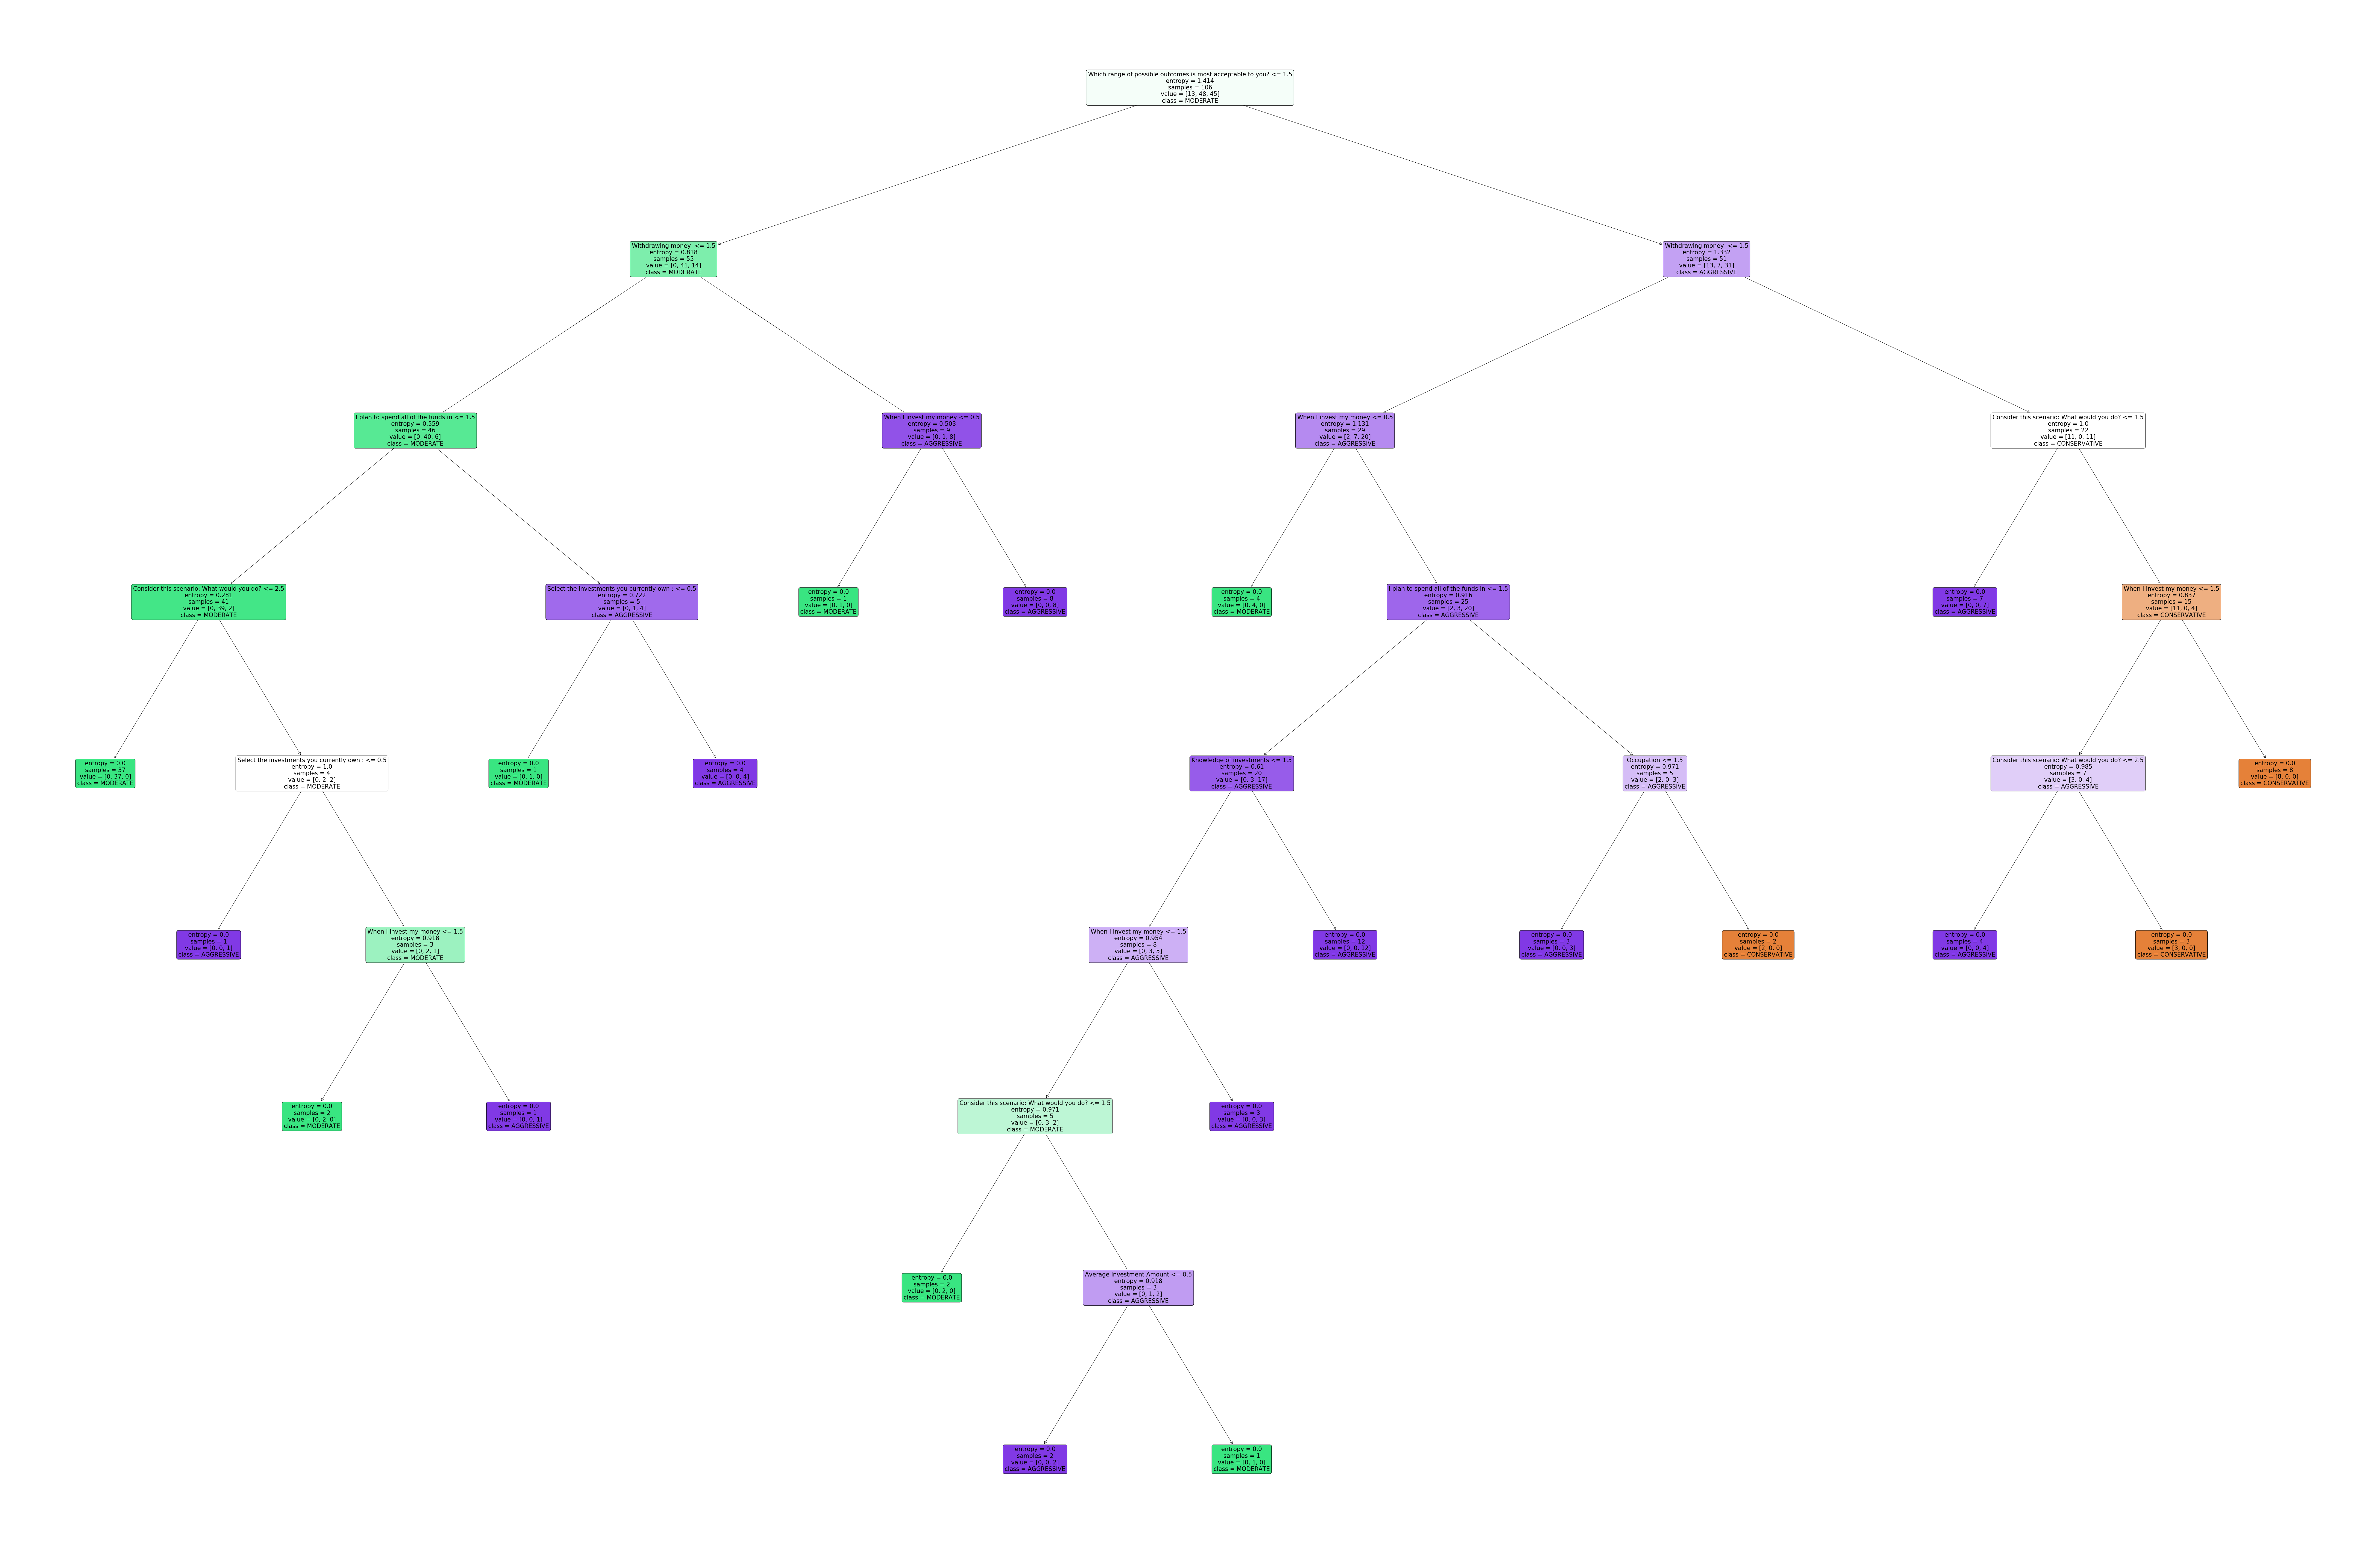

In [22]:
feature_names = df.columns[6:17]

target_names = df['Risk Profile'].unique().tolist()

plot_tree(dtree,feature_names = feature_names,class_names = target_names, filled = True, rounded = True)

plt.savefig('Full Data Tree.png')

# Decision tree using Hold out validation

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 101)

In [26]:
model = dtc(criterion='entropy')
model.fit(X_train, 
          y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))




Accuracy of the model is 81%


In [27]:
rcParams['figure.figsize'] = (150, 100)

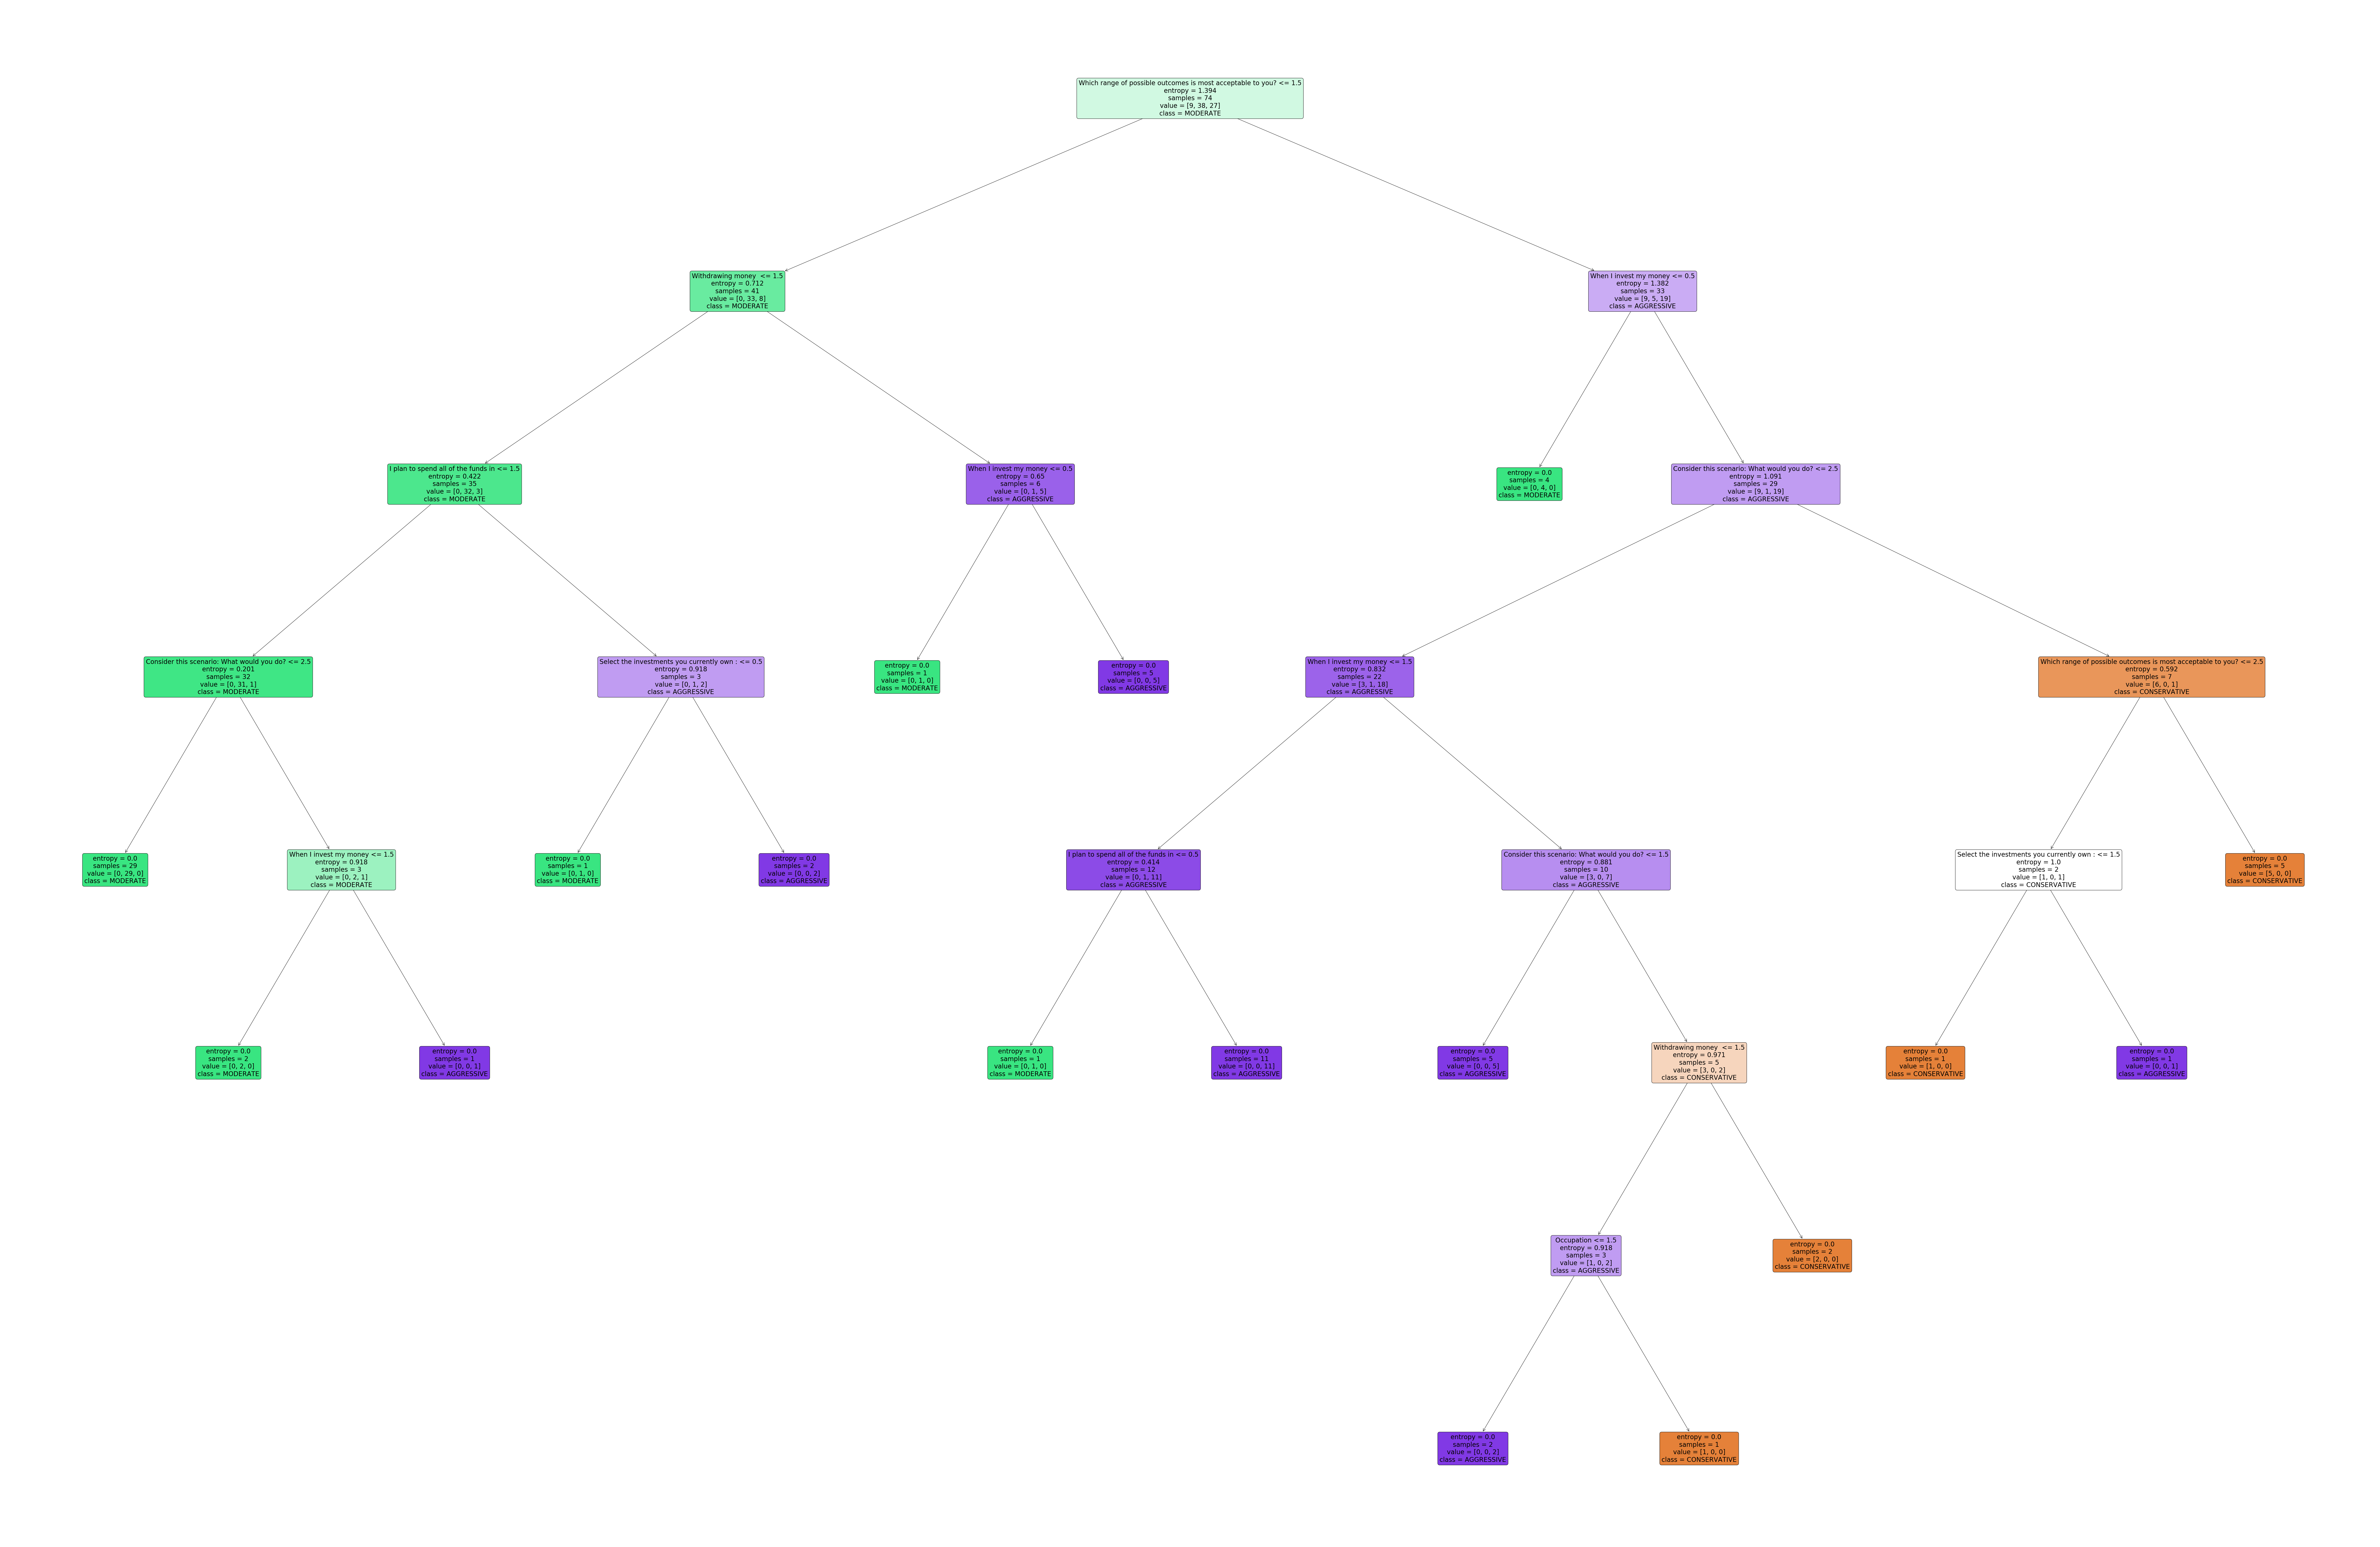

In [28]:
feature_names = df.columns[6:17]

target_names = df['Risk Profile'].unique().tolist()

plot_tree(model,feature_names = feature_names,class_names = target_names, filled = True, rounded = True)

plt.savefig('tree_visualization.png')
plt.savefig('Decision_tree.jpg')


In [29]:
import sklearn.metrics as mt

In [30]:
print(mt.classification_report(y_test, pred_model))

              precision    recall  f1-score   support

  AGGRESSIVE       0.80      1.00      0.89         4
CONSERVATIVE       0.73      0.80      0.76        10
    MODERATE       0.88      0.78      0.82        18

    accuracy                           0.81        32
   macro avg       0.80      0.86      0.82        32
weighted avg       0.82      0.81      0.81        32



In [31]:
print(mt.confusion_matrix(y_test, pred_model))

[[ 4  0  0]
 [ 0  8  2]
 [ 1  3 14]]


In [32]:
print("accuracy",mt.accuracy_score(y_test, pred_model))

accuracy 0.8125


In [33]:
print("f1 score macro",mt.f1_score(y_test, pred_model, average='macro') )

f1 score macro 0.8247743541861189


In [34]:
print("f1 score micro",mt.f1_score(y_test, pred_model, average='micro'))
print("precision score",mt.precision_score(y_test, pred_model, average='macro')) 
print("recall score",mt.recall_score(y_test, pred_model, average='macro'))
print( "hamming_loss",mt.hamming_loss(y_test, pred_model))
print("classification_report", mt.classification_report(y_test, pred_model))
print("jaccard_similarity_score", mt.jaccard_similarity_score(y_test, pred_model))

f1 score micro 0.8125
precision score 0.8007575757575758
recall score 0.8592592592592593
hamming_loss 0.1875
classification_report               precision    recall  f1-score   support

  AGGRESSIVE       0.80      1.00      0.89         4
CONSERVATIVE       0.73      0.80      0.76        10
    MODERATE       0.88      0.78      0.82        18

    accuracy                           0.81        32
   macro avg       0.80      0.86      0.82        32
weighted avg       0.82      0.81      0.81        32

jaccard_similarity_score 0.8125


C:\Users\AZAR\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
